In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout

2024-02-05 22:27:22.865209: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
class MNISTClassifier:
    def __init__(self):
        self.model = None

    def load_mnist_data(self):
        (x_train, y_train), (x_test, y_test) = mnist.load_data()
        return x_train, y_train, x_test, y_test

    def preprocess_data(self, x_train, y_train, x_test, y_test):
        num_labels = len(np.unique(y_train))
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)

        image_size = x_train.shape[1]
        input_size = image_size * image_size

        x_train = np.reshape(x_train, [-1, input_size])
        x_train = x_train.astype('float32') / 255

        x_test = np.reshape(x_test, [-1, input_size])
        x_test = x_test.astype('float32') / 255

        return x_train, y_train, x_test, y_test, num_labels

    def build_model(self, input_size, hidden_units, num_labels, dropout):
        model = Sequential()
        model.add(Dense(hidden_units, input_dim=input_size))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))

        model.add(Dense(hidden_units))
        model.add(Activation('relu'))
        model.add(Dropout(dropout))

        model.add(Dense(num_labels))
        model.add(Activation('softmax'))
        model.summary()

        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        return model

    def train_model(self, model, x_train, y_train, epochs, batch_size):
        model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

    def evaluate_model(self, model, x_test, y_test, batch_size):
        _, accuracy = model.evaluate(x_test, y_test, batch_size=batch_size, verbose=0)
        return accuracy

    def load_and_predict_image(self, image_path, model):
        read_image = cv2.imread(image_path)
        image_np = cv2.cvtColor(read_image, cv2.COLOR_BGR2GRAY)
        image_np = cv2.resize(image_np, (28, 28))
        image_np = image_np.reshape(1, -1).astype('float32') / 255
        return model.predict(image_np), image_np, read_image

    def display_image(self, image_np, predicted_label):
        plt.figure("Prediction output")
        plt.imshow(image_np, cmap='gray')
        plt.title(f'Predicted Label: {predicted_label}')
        plt.show()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 activation_6 (Activation)   (None, 256)               0         
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 activation_7 (Activation)   (None, 256)               0         
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_8 (Dense)             (None, 10)               

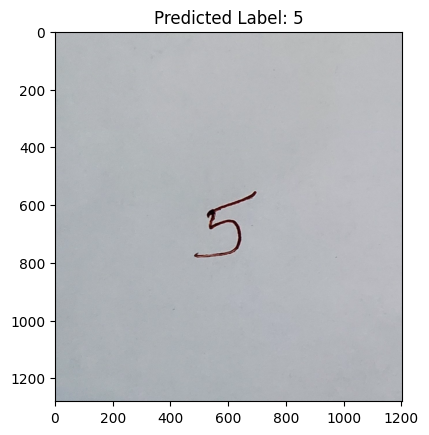

In [8]:
if __name__ == "__main__":
    mnist_classifier = MNISTClassifier()

    x_train, y_train, x_test, y_test = mnist_classifier.load_mnist_data()
    x_train, y_train, x_test, y_test, num_labels = mnist_classifier.preprocess_data(x_train, y_train, x_test, y_test)

    batch_size = 128
    hidden_units = 256
    dropout = 0.45
    input_size = x_train.shape[1]

    mnist_classifier.model = mnist_classifier.build_model(input_size, hidden_units, num_labels, dropout)
    mnist_classifier.train_model(mnist_classifier.model, x_train, y_train, epochs=20, batch_size=batch_size)

    accuracy = mnist_classifier.evaluate_model(mnist_classifier.model, x_test, y_test, batch_size=batch_size)
    print("Accuracy: %.1f%%" % (100.0 * accuracy))

    image_path = 'captured_5_1.jpg'
    predictions, image_val, read_image = mnist_classifier.load_and_predict_image(image_path, mnist_classifier.model)
    predicted_label = np.argmax(predictions)
    print("Predicted Label:", predicted_label)

    mnist_classifier.display_image(image_np=read_image, predicted_label=predicted_label)